# 1. LATAR BELAKANG

Sebuah perusahaan maskapai penerbangan telah melakukan **survey kepuasan dari penumpang pesawat** yang melakukan penerbangan dengan maskapai tersebut. Perusahaan maskapai tersebut ingin **meningkatkan jumlah penumpang yang loyal**  agar **selalu dan tetap menggunakan maskapai tersebut** dan **tidak berpindah ke maskapai lain**. Banyak penumpang yang telah mengisi survey kepuasan, tapi tidak semua penumpang berasal dari penumpang yang loyal dan tidak semua penumpang menggunakan fasilitas yang sama

# 2. PERMASALAHAN

Perusahaan maskapai penerbangan ingin meningkatkan kepuasan terhadap **loyal customer** untuk mempertahankan  loyalitasnya.

Sebagai seorang *data analyst*, kita akan menjawab pertanyaan:  
* **Apa yang menyebabkan penumpang loyal tidak merasa puas terhadap layanan maskapai?**

* **Bagaimana cara meningkatkan kepuasan penumpang?**

# 3. IMPORT LIBRARY
Pertama, kita import dahulu package yang sudah ada di **python**

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from operator import attrgetter
import statsmodels
import scipy

# 4. DATA
Untuk menjawab pertanyaan tersebut, kita dapat menganalisa dataset **Airline Passenger Satisfaction Predictive Analysis**. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/deltasierra452/airline-pax-satisfaction-survey)

In [2]:
# Berikut ini merupakan 5 data pertama dari dataset airline passanger satisfaction
df = pd.read_csv('airline passanger satisfaction.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Kita menghapus kolom **Unnamed: 0** karena isi dari kolom tersebut **sama dengan** nomor index tabel. Kita dapat menghapus menggunakan **drop**.

In [3]:
df=df.drop(columns=['Unnamed: 0'])
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
print(f'Jumlah baris dan kolom dari dataset adalah {df.shape}')
df.info()

Jumlah baris dan kolom dari dataset adalah (103904, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-nu

## 4.1. Data  Understanding dan Cleaning

Dataset yang digunakan adalah **data hasil survey** kepuasan suatu maskapai pesawat berisi terhadap **103904** penumpang di mana **setiap barisnya** merupakan **hasil survey dari satu penumpang** dengan **25** kolom (8: identitas penumpang, 14: layanan yang dinilai, 1: kesimpulan dari survey) di antaranya:  

**Identitas penumpang:**
* **Id** merupakan no id dari masing-masing penumpang di mana satu penumpang hanya memiliki 1 no id
* **Gender** merupakan jenis kelamin penumpang
* customer type merupakan tipe keloyalitasan penumpang
* **Age** merupakan usia penumpang

**Tipe perjalanan:**
* **Type of Travel** merupakan jenis perjalanan
* **Class** merupakan jenis kelas yang penumpang naiki

**Identitas penerbangan:**
* **Flight Distance** merupakan jarak penerbangan
* **Departure Delay in Minutes** merupakan lama pesawat didelay saat keberangkatan (dalam menit)
* **Arrival Delay in Minutes** merupakan lama pesawat didelay saat kedatangan (dalam menit)

**Layanan dari maskapai yang dinilai:**
* **Inflight Wifi Service** merupakan tingkat kepuasan penumpang terhadap pelayanan wifi selama penerbangan
* **Departure/Arrival Time Convenient** merupakan tingkat kepuasan penumpang terhadap waktu keberangkatan/kedatangan
* **Ease of Online Booking** merupakan tingkat kepuasan penumpang terhadap online booking
* **Gate Location** merupakan tingkat kepuasan penumpang terhadap lokasi gate
* **Food and Drink** merupakan tingkat kepuasan penumpang terhadap servis makanan dan minuman
* **Online Boarding** merupakan tingkat kepuasan penumpang terhadap online boarding
* **Seat Comfort** merupakan tingkat kepuasan kenyaman tempat duduk
* **Inflight Entertainment** merupakan tingkat kepuasan penumpang terhadap hiburan di dalam pesawat
* **On-board Service** merupakan tingkat kepuasan penumpang terhadap pelayanan di dalam pesawat selama boarding
* **Leg Room Service** merupakan tingkat kepuasan penumpang terhadap jarak kaki dengan kursi
* **Baggage Handling** merupakan tingkat kepuasan penumpang terhadap penanganan bagasi
* **Checkin Service** merupakan tingkat kepuasan penumpang terhadap pelayanan checkin
* **Inflight Service** merupakan tiangkat kepuasan penumpang terhadap pelayanan selama terbang
* **Cleanliness** merupakan tingkat kepuasan penumpang terhadap kebersihan pesawat

**Kesimpulan dari survey:**
* **Satisfaction** merupakan kategori kepuasan dari hasil akhir survey ('satisfied', 'neutral' or dissatisfied')

In [9]:
df.describe(include='all')

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904
unique,NaN,2,2,NaN,2,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,NaN,52727,84923,NaN,71655,49665,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,64924.210502,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,2.756901,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,NaN
std,37463.812252,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,1.398929,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,NaN
min,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,32533.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,64856.500000,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,97368.250000,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


In [11]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

C:\Users\Icha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Column Name,Number of Unique,Unique Sample
0,id,103904,"[70172, 5047, 110028, 24026, 119299, 111157, 82113, 96462, 79485, 65725, 34991, 51412, 98628, 83502, 95789, 100580, 71142, 127461, 70354, 66246, 39076, 22434, 43510, 114090, 105420, 102956, 18510, 14925, 118319, 75460, 48492, 27809, 70594, 30089, 58779, 79659, 110293, 48014, 96517, 64685, 64138, 60373, 14849, 28319, 103012, 124114, 107794, 81983, 53164, 82042, 72127, 113046, 1050, 54886, 125918, 7467, 78972, 126625, 114501, 114813, 32167, 68001, 117052, 8661, 57165, 78610, 51058, 92027, 115534, 9261, 61033, 75930, 112142, 24518, 112524, 101639, 85018, 106922, 32564, 92242, 73302, 42267, 121358, 65655, 88062, 91330, 22031, 27921, 51947, 40017, 76392, 118486, 6012, 30183, 41652, 15138, 123589, 114534, 93076, 96963, ...]"
1,Gender,2,"[Male, Female]"
2,Customer Type,2,"[Loyal Customer, disloyal Customer]"
3,Age,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38, 9, 17, 43, 58, 23, 57, 49, 36, 22, 31, 15, 35, 67, 37, 40, 34, 39, 50, 29, 54, 21, 28, 27, 69, 60, 48, 59, 46, 30, 66, 64, 44, 51, 32, 19, 42, 16, 11, 62, 8, 56, 68, 55, 18, 65, 72, 70, 63, 10, 7, 14, 80, 74, 71, 85, 73, 76, 77, 75, 79, 78]"
4,Type of Travel,2,"[Personal Travel, Business travel]"
5,Class,3,"[Eco Plus, Business, Eco]"
6,Flight Distance,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 853, 1061, 1182, 308, 834, 946, 453, 486, 2123, 2075, 2486, 1174, 208, 752, 2139, 452, 719, 1561, 315, 3347, 2342, 819, 1043, 2611, 1192, 349, 883, 550, 302, 354, 1734, 1452, 296, 2882, 529, 1522, 612, 1454, 731, 2076, 309, 775, 861, 3334, 2496, 602, 446, 216, 3475, 646, 2501, 2227, 1426, 190, 1532, 157, 1506, 205, 895, 516, 909, 1435, 1190, 1259, 1670, 3960, 817, 406, 404, 500, 689, 3100, 525, 931, 304, 1896, 261, 347, 1042, 1773, 342, 297, 332, 2388, 748, 1080, 231, 551, 972, 265, 488, 1144, ...]"
7,Inflight wifi service,6,"[3, 2, 4, 1, 5, 0]"
8,Departure/Arrival time convenient,6,"[4, 2, 5, 3, 1, 0]"
9,Ease of Online booking,6,"[3, 2, 5, 4, 1, 0]"


In [12]:
df.duplicated().sum()

0

In [13]:
df.isna().sum()

id                                   0  
Gender                               0  
Customer Type                        0  
Age                                  0  
Type of Travel                       0  
Class                                0  
Flight Distance                      0  
Inflight wifi service                0  
Departure/Arrival time convenient    0  
Ease of Online booking               0  
Gate location                        0  
Food and drink                       0  
Online boarding                      0  
Seat comfort                         0  
Inflight entertainment               0  
On-board service                     0  
Leg room service                     0  
Baggage handling                     0  
Checkin service                      0  
Inflight service                     0  
Cleanliness                          0  
Departure Delay in Minutes           0  
Arrival Delay in Minutes             310
satisfaction                         0  
dtype: int64

Kita dapat melihat bahwa:
* Tidak ada kolom yang *duplicated* dan salah dalam penulisan
* Kolom `Arrival Delay in Minutes` memiliki data kosong yang diwakili dengan data NaN
* Jenis kolom **layanan maskapai yang dinilai** merupakan hasil **tingkat kepuasan** penumpang, di mana:
    * 0 artinya tidak merasa menggunakan layanan tersebut atau tidak puas sama sekali
    * 1 artinya tidak puas
    * 2 artinya kurang puas
    * 3 artinya cukup puas
    * 4 artinya puas
    * 5 artinya sangat puas
* Kolom `id` merupakan no id unik dari setiap penumpang sehingga dapat **diabaikan**

### Missing Value

In [14]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes        

In [15]:
index_nan=df.loc[df.isna()['Arrival Delay in Minutes']==True].index
index_nan

Int64Index([   213,   1124,   1529,   2004,   2108,   2485,   2630,   3621,
              4041,   4490,
            ...
            100426, 100682, 100962, 101242, 101532, 102067, 102384, 102552,
            102960, 103540],
           dtype='int64', length=310)

In [16]:
len(index_nan)

310

Berikut ini adalah data di mana kolom `Arrival Delay in Minutes` bernilai **NaN**

In [17]:
df.loc[index_nan]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,...,5,1,5,5,5,3,5,0,NaN,satisfied


**Cara mengisi *missing value*:**  
   * Kita dapat mengisi kolom `Arrival Delay in Minutes` dengan mean (jika data berdistribusi normal), median (jika data berdistribusi tidak normal), modus (data kategorikal)   
   
Karena kolom `Arrival Delay in Minutes` merupakan data **numerik** sehingga perlu dicek terlebih dahulu apakah data tersebut berdistribusi normal atau tidak normal

In [18]:
# D'AGUSTINO AND PEARSON
from scipy.stats import normaltest
stats3,pval3=normaltest(df['Arrival Delay in Minutes'].dropna())
if pval3>0.05:
    print('Data berdistribusi normal')
else:
    print('Data berdistribusi tidak normal')

Data berdistribusi tidak normal


Kita dapat mengisi kolom `Arrival Delay in Minutes` dengan **median** dari kolom tersebut berdasarkan `Departure Delay menit ke-` agar isinya masih dalam rentang waktu yang sama dengan `Departure Delay in Minutes`.

Kolom `Departure Delay menit ke-` adalah pengelompokkan kolom `Departure Delay in Minutes` berdasarkan **departure delay** per **30 menit**

In [19]:
df['Departure Delay menit ke-']=df['Departure Delay in Minutes']//30+1

In [20]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Departure Delay menit ke-
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,1
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,1
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,1
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,1


In [21]:
df['Arrival Delay in Minutes']=df.groupby('Departure Delay menit ke-')['Arrival Delay in Minutes'].apply(lambda x:x.fillna(x.median()))

Berikut ini adalah tabel dengan kolom `Arrival Delay in Minutes` sudah terisi

In [22]:
df.loc[index_nan]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Departure Delay menit ke-
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,...,5,2,4,1,1,5,31,37.0,satisfied,2
1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,...,4,4,4,3,3,4,38,37.0,neutral or dissatisfied,2
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,...,2,2,2,2,2,3,11,0.0,neutral or dissatisfied,1
2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,...,3,3,4,5,5,2,41,37.0,neutral or dissatisfied,2
2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,...,1,4,2,1,2,5,1,0.0,neutral or dissatisfied,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,...,4,5,4,3,4,3,230,221.0,neutral or dissatisfied,8
102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,...,3,1,2,4,2,3,55,37.0,neutral or dissatisfied,2
102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,...,4,1,5,5,3,5,0,0.0,neutral or dissatisfied,1
102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,...,1,5,5,5,3,5,0,0.0,satisfied,1


* Karena sebelumnya kolom `Arrival Delay in Minutes` terdapat NaN maka tipe datanya adalah **float**. 
* Karena waktu per menit dalam keterlambatan dalam bentuk bilangan bulat  

Maka, tipe data kolom `Arrival Delay in Minutes` diubah agar sesuai menjadi **integer**

In [25]:
df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].astype('int64')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   id                                 103904 non-null  int64 
 1   Gender                             103904 non-null  object
 2   Customer Type                      103904 non-null  object
 3   Age                                103904 non-null  int64 
 4   Type of Travel                     103904 non-null  object
 5   Class                              103904 non-null  object
 6   Flight Distance                    103904 non-null  int64 
 7   Inflight wifi service              103904 non-null  int64 
 8   Departure/Arrival time convenient  103904 non-null  int64 
 9   Ease of Online booking             103904 non-null  int64 
 10  Gate location                      103904 non-null  int64 
 11  Food and drink                     103904 non-null  

In [27]:
df.loc[index_nan]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Departure Delay menit ke-
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,...,5,2,4,1,1,5,31,37,satisfied,2
1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,...,4,4,4,3,3,4,38,37,neutral or dissatisfied,2
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,...,2,2,2,2,2,3,11,0,neutral or dissatisfied,1
2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,...,3,3,4,5,5,2,41,37,neutral or dissatisfied,2
2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,...,1,4,2,1,2,5,1,0,neutral or dissatisfied,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,...,4,5,4,3,4,3,230,221,neutral or dissatisfied,8
102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,...,3,1,2,4,2,3,55,37,neutral or dissatisfied,2
102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,...,4,1,5,5,3,5,0,0,neutral or dissatisfied,1
102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,...,1,5,5,5,3,5,0,0,satisfied,1


Kolom `Departure Delay menit ke-` sudah tidak digunakan lagi maka kita dapat menghapusnya.  

Penulisan dari masing-masing kolom disamakan agar lebih rapi

In [28]:
df=df.drop(columns=['Departure Delay menit ke-'])
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0,satisfied


In [29]:
df=df.rename(columns={'id':'Id',
                   'Inflight wifi service':'Inflight Wifi Service',
                   'Departure/Arrival time convenient':'Departure/Arrival Time Convenient',
                   'Ease of Online booking':'Ease of Online Booking',
                   'Gate location':'Gate Location',
                   'Food and drink':'Food and Drink',
                   'Online boarding':'Online Boarding',
                   'Seat comfort':'Seat Comfort',
                   'Inflight entertainment':'Inflight Entertainment',
                   'On-board service':'On-board Service',
                   'Leg room service':'Leg Room Service',
                   'Baggage handling':'Baggage Handling',
                   'Checkin service':'Checkin Service',
                   'Inflight service':'Inflight Service',
                   'satisfaction':'Satisfaction'})

In [30]:
df.head()

,Id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenient,Ease of Online Booking,...,Inflight Entertainment,On-board Service,Leg Room Service,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0,satisfied


In [31]:
df.loc[df['Customer Type']=='disloyal Customer','Customer Type']='Disloyal Customer'
df.head()

,Id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenient,Ease of Online Booking,...,Inflight Entertainment,On-board Service,Leg Room Service,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18,neutral or dissatisfied
1,5047,Male,Disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0,satisfied


In [32]:
df.loc[df['Type of Travel']=='Business travel','Type of Travel']='Business Travel'
df.head(1)

,Id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenient,Ease of Online Booking,...,Inflight Entertainment,On-board Service,Leg Room Service,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18,neutral or dissatisfied


In [33]:
df.loc[df['Satisfaction']=='neutral or dissatisfied','Satisfaction']='Neutral or Dissatisfied'
df.loc[df['Satisfaction']=='satisfied','Satisfaction']='Satisfied'
df.head()

,Id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenient,Ease of Online Booking,...,Inflight Entertainment,On-board Service,Leg Room Service,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18,Neutral or Dissatisfied
1,5047,Male,Disloyal Customer,25,Business Travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6,Neutral or Dissatisfied
2,110028,Female,Loyal Customer,26,Business Travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0,Satisfied
3,24026,Female,Loyal Customer,25,Business Travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9,Neutral or Dissatisfied
4,119299,Male,Loyal Customer,61,Business Travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0,Satisfied


Periksa kembali apakah penulisan nama dari masing-masing kolom dan isinya sudah rapi dan sesuai

In [34]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

C:\Users\Icha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Column Name,Number of Unique,Unique Sample
0,Id,103904,"[70172, 5047, 110028, 24026, 119299, 111157, 82113, 96462, 79485, 65725, 34991, 51412, 98628, 83502, 95789, 100580, 71142, 127461, 70354, 66246, 39076, 22434, 43510, 114090, 105420, 102956, 18510, 14925, 118319, 75460, 48492, 27809, 70594, 30089, 58779, 79659, 110293, 48014, 96517, 64685, 64138, 60373, 14849, 28319, 103012, 124114, 107794, 81983, 53164, 82042, 72127, 113046, 1050, 54886, 125918, 7467, 78972, 126625, 114501, 114813, 32167, 68001, 117052, 8661, 57165, 78610, 51058, 92027, 115534, 9261, 61033, 75930, 112142, 24518, 112524, 101639, 85018, 106922, 32564, 92242, 73302, 42267, 121358, 65655, 88062, 91330, 22031, 27921, 51947, 40017, 76392, 118486, 6012, 30183, 41652, 15138, 123589, 114534, 93076, 96963, ...]"
1,Gender,2,"[Male, Female]"
2,Customer Type,2,"[Loyal Customer, Disloyal Customer]"
3,Age,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38, 9, 17, 43, 58, 23, 57, 49, 36, 22, 31, 15, 35, 67, 37, 40, 34, 39, 50, 29, 54, 21, 28, 27, 69, 60, 48, 59, 46, 30, 66, 64, 44, 51, 32, 19, 42, 16, 11, 62, 8, 56, 68, 55, 18, 65, 72, 70, 63, 10, 7, 14, 80, 74, 71, 85, 73, 76, 77, 75, 79, 78]"
4,Type of Travel,2,"[Personal Travel, Business Travel]"
5,Class,3,"[Eco Plus, Business, Eco]"
6,Flight Distance,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 853, 1061, 1182, 308, 834, 946, 453, 486, 2123, 2075, 2486, 1174, 208, 752, 2139, 452, 719, 1561, 315, 3347, 2342, 819, 1043, 2611, 1192, 349, 883, 550, 302, 354, 1734, 1452, 296, 2882, 529, 1522, 612, 1454, 731, 2076, 309, 775, 861, 3334, 2496, 602, 446, 216, 3475, 646, 2501, 2227, 1426, 190, 1532, 157, 1506, 205, 895, 516, 909, 1435, 1190, 1259, 1670, 3960, 817, 406, 404, 500, 689, 3100, 525, 931, 304, 1896, 261, 347, 1042, 1773, 342, 297, 332, 2388, 748, 1080, 231, 551, 972, 265, 488, 1144, ...]"
7,Inflight Wifi Service,6,"[3, 2, 4, 1, 5, 0]"
8,Departure/Arrival Time Convenient,6,"[4, 2, 5, 3, 1, 0]"
9,Ease of Online Booking,6,"[3, 2, 5, 4, 1, 0]"


## 4.2. Data yang sudah bersih
Kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [56]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['Data Features', 'Data Type', 'Null', 'Unique', 'Unique Sample'],
                     data=listItem)
print(df.shape)
dfDesc

(103904, 24)


,Data Features,Data Type,Null,Unique,Unique Sample
0,Id,int64,0,103904,"[60769, 77621]"
1,Gender,object,0,2,"[Female, Male]"
2,Customer Type,object,0,2,"[Loyal Customer, Disloyal Customer]"
3,Age,int64,0,75,"[45, 26]"
4,Type of Travel,object,0,2,"[Business Travel, Personal Travel]"
5,Class,object,0,3,"[Eco Plus, Eco]"
6,Flight Distance,int64,0,3802,"[2767, 1820]"
7,Inflight Wifi Service,int64,0,6,"[1, 3]"
8,Departure/Arrival Time Convenient,int64,0,6,"[0, 3]"
9,Ease of Online Booking,int64,0,6,"[5, 2]"


Agar lebih singkat, kolom-kolom yang merupakan **layanan maskapai yang dinilai** disimpan dengan suatu variabel `feature_hasil_survey`

In [36]:
feature_hasil_survey=['Inflight Wifi Service',
       'Departure/Arrival Time Convenient',
       'Ease of Online Booking',
       'Gate Location',
       'Food and Drink',
       'Online Boarding',
       'Seat Comfort',
       'Inflight Entertainment',
       'On-board Service',
       'Leg Room Service',
       'Baggage Handling',
       'Checkin Service',
       'Inflight Service',
       'Cleanliness']

In [233]:
df.head()

,Id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenient,Ease of Online Booking,...,On-board Service,Leg Room Service,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction,rata_hasil_survey
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,3,4,4,5,5,25,18,Neutral or Dissatisfied,3.86
1,5047,Male,Disloyal Customer,25,Business Travel,Business,235,3,2,3,...,1,5,3,1,4,1,1,6,Neutral or Dissatisfied,2.29
2,110028,Female,Loyal Customer,26,Business Travel,Business,1142,2,2,2,...,4,3,4,4,4,5,0,0,Satisfied,3.71
3,24026,Female,Loyal Customer,25,Business Travel,Business,562,2,5,5,...,2,5,3,1,4,2,11,9,Neutral or Dissatisfied,3.00
4,119299,Male,Loyal Customer,61,Business Travel,Business,214,3,3,3,...,3,4,4,3,3,3,0,0,Satisfied,3.50


Setelah dataset bersih dan rapi simpan dengan file baru

In [234]:
df.to_csv('Airlines Baru.csv')

# 5. DATA ANALYSIS

In [121]:
normalized_satis_cust=pd.crosstab(df['Satisfaction'],df['Customer Type'],normalize='index')

In [122]:
normalized_satis_cust

Customer Type,Disloyal Customer,Loyal Customer
Satisfaction,,
Neutral or Dissatisfied,0.246081,0.753919
Satisfied,0.099767,0.900233


In [165]:
pd.crosstab(df['Customer Type'],df['Satisfaction'],normalize='index')

Satisfaction,Neutral or Dissatisfied,Satisfied
Customer Type,,
Disloyal Customer,0.763342,0.236658
Loyal Customer,0.522709,0.477291


In [236]:
pd.crosstab(df['Customer Type'],df['Satisfaction'])

Satisfaction,Neutral or Dissatisfied,Satisfied
Customer Type,,
Disloyal Customer,14489,4492
Loyal Customer,44390,40533


<Figure size 1440x1440 with 0 Axes>

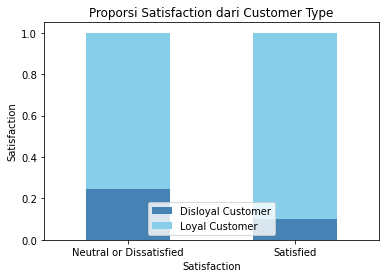

In [238]:
plt.figure(figsize=(20,20))
normalized_satis_cust.plot.bar(color=('steelblue','skyblue'), stacked=True)
plt.ylabel('Satisfaction')
plt.xticks(rotation=0)
plt.legend(loc=8)
plt.title('Proporsi Satisfaction dari Customer Type')


plt.show()

Dari crosstab dan grafik di atas, terlihat bahwa proposi **loyal customer** yang merasa **satisfied** lebih tinggi dibandingkan disloyal customer. Sehingga kita dapat menganalisa **loyal customer**

* Dari hasil cross tabulasi dan grafik di atas, kita dapat melihat bahwa proporsi **loyal customer** yang **satisfied** dengan fasilitas maskapai lebih tinggi dibandingkan **disloyal customer**.  

* Walaupun proporsi **loyal customer** yang **satisfied** lebih sedikit dibandingkan **neutral or dissatisfied**, selisih proporsi keduanya **tidak berbeda** jauh.

Dari dua masalah tersebut, kita analisa bagaimana cara meningkatkan **Satisfaction** dari penumpang

Dari poin 2, kita dapat menganalisa fasilitas apa yang perlu ditingkatkan terhadap **loyal customer** agar proporsi **satisfied** meningkat

## 5.1. KARAKTERISTIK LOYAL CUSTOMER

In [38]:
df['Customer Type'].value_counts()

Loyal Customer       84923
Disloyal Customer    18981
Name: Customer Type, dtype: int64

Dari penumpang yang mengisi survey, penumpang terbagi menjadi dua tipe berdasarkan **loyalitasnya**:
* Loyal Customer sebanyak 84.923 penumpang
* Disloyal Customer sebanyak 18.981 penumpang

Kita dapat menganalisa karakteristik **loyal customer** untuk meningkatkan jumlahnya

### 5.1.1. Berdasarkan Identitas Penumpang (`Age` dan `Gender`)
Bagaimana karakterisitik **loyal customer** berdasarkan identitas dari penumpang. Kita akan menganalisis kolom `Age` dan `Gender` terhadap `Customer Type` untuk menjawab beberapa pertanyaan berikut:
* Loyal customer **berjenis kelamin** apa yang memiliki jumlah paling banyak?
* Loyal customer dengan **usia** berapa yang memiliki jumlah paling banyak?

In [67]:
pd.crosstab(df['Customer Type'],df['Gender'])

Gender,Female,Male
Customer Type,,
Disloyal Customer,10269,8712
Loyal Customer,42458,42465


In [64]:
normalize_customer_type_gender=pd.crosstab(df['Customer Type'],df['Gender'], normalize='index')
normalize_customer_type_gender

Gender,Female,Male
Customer Type,,
Disloyal Customer,0.541015,0.458985
Loyal Customer,0.499959,0.500041


<Figure size 1440x1440 with 0 Axes>

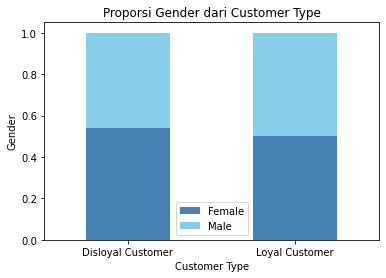

In [237]:
plt.figure(figsize=(20,20))
normalize_customer_type_gender.plot.bar(color=('steelblue','skyblue'), stacked=True)
plt.ylabel('Gender')
plt.xticks(rotation=0)
plt.legend(loc=8)
plt.title('Proporsi Gender dari Customer Type')

plt.show()

Dari hasil cross tabulasi dan grafik di atas, terlihat bahwa:
* Proporsi **loyal** customer **pria** **>** proporsi **loyal** customer **wanita**
* Proporsi **disloyal** customer **pria** **<** proporsi **disloyal** customer **wanita**

Artinya, kemungkinan **loyal customer** berasal dari customer **pria**

In [55]:
df.loc[df['Customer Type']=='Loyal Customer','Age'].value_counts()

39    2375
41    2284
40    2224
42    2189
44    2188
      ... 
76    45  
74    42  
79    36  
78    31  
85    10  
Name: Age, Length: 75, dtype: int64

In [82]:
pd.crosstab(df['Age'],df['Customer Type']).sort_values('Age',ascending=True)

Customer Type,Disloyal Customer,Loyal Customer
Age,,
7,25,537
8,76,564
9,80,612
10,87,596
11,95,583
...,...,...
77,7,80
78,2,31
79,6,36


<Figure size 1440x1440 with 0 Axes>

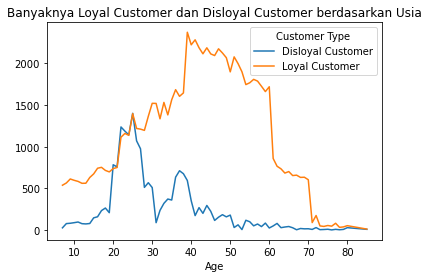

<Figure size 1440x1440 with 0 Axes>

In [242]:
pd.crosstab(df['Age'],
            df['Customer Type']).sort_values('Age',ascending=True).plot(kind='line',
                                                                        title='Banyaknya Loyal Customer dan Disloyal Customer berdasarkan Usia')
plt.figure(figsize=(20,20))

In [100]:
ct_cutomer_type_age=pd.crosstab(df['Age'],df['Customer Type']).sort_values('Loyal Customer',ascending=False)
ct_cutomer_type_age['Total']=ct_cutomer_type_age.sum(axis=1)

Berikut ini adalah data 10 usia dengan jumlah penumpang paling banyak, dibagi berdasarkan `Customer Type`

In [102]:
ct_cutomer_type_age.sort_values('Total',ascending=False).head(10)

Customer Type,Disloyal Customer,Loyal Customer,Total
Age,,,
39,594,2375,2969
25,1401,1397,2798
40,350,2224,2574
44,294,2188,2482
42,268,2189,2457
41,172,2284,2456
22,1237,1114,2351
23,1187,1159,2346
45,224,2115,2339


Berikut ini adalah data 10 usia dengan jumlah **loyal customer** paling tinggi

In [244]:
ct_cutomer_type_age.sort_values('Loyal Customer',ascending=False).head(10)

Customer Type,Disloyal Customer,Loyal Customer,Total
Age,,,
39,594,2375,2969
41,172,2284,2456
40,350,2224,2574
42,268,2189,2457
44,294,2188,2482
47,153,2176,2329
48,183,2126,2309
43,199,2116,2315
45,224,2115,2339


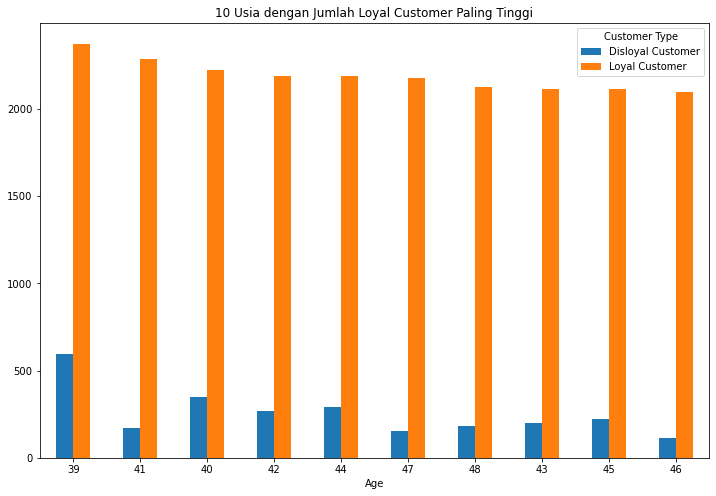

In [241]:
ct_cutomer_type_age.sort_values('Loyal Customer',ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(12,8), 
title='10 Usia dengan Jumlah Loyal Customer Paling Tinggi')
plt.xticks(rotation=0)
plt.show()

Dari hasil cross tabulasi dan grafik di atas, terlihat bahwa:
* Jumlah penumpang paling banyak berusia **39** tahun
* Jumlah **loyal** customer paling tinggi berusia **39** tahun 
* 10 jumlah **loyal customer** tertinggi berusia **39-48** tahun
* 10 jumlah **disloyal customer** tertinggi berusia sekitar **20** tahun

Artinya, penumpang berusia **39** tahun loyal melakukan penerbangan dengan maskapai kita. Dan, penumpang yang berusia middle age sekitar **20-60** tahun lebih banyak **loyal customer** dibandingkan penumpang berusia muda 

### 5.1.2. Berdasarkan Tipe penerbangan (`Type of Travel` dan `Class`)
Bagaimana karakterisitik **loyal customer** berdasarkan tipe penerbangannya. Kita akan menganalisis kolom `Type of Travel` dan `Class` terhadap `Customer Type` untuk menjawab beberapa pertanyaan berikut:
* Loyal customer dengan **urusan perjalanan** apa yang memiliki jumlah paling banyak?
* Loyal customer pada **kelas** apa yang memiliki jumlah paling banyak?

In [66]:
pd.crosstab(df['Customer Type'], df['Type of Travel'])

Type of Travel,Business Travel,Personal Travel
Customer Type,,
Disloyal Customer,18817,164
Loyal Customer,52838,32085


In [70]:
normalize_customer_type_travel=pd.crosstab(df['Customer Type'], df['Type of Travel'], normalize='index')
normalize_customer_type_travel

Type of Travel,Business Travel,Personal Travel
Customer Type,,
Disloyal Customer,0.991360,0.008640
Loyal Customer,0.622187,0.377813


<Figure size 1440x1440 with 0 Axes>

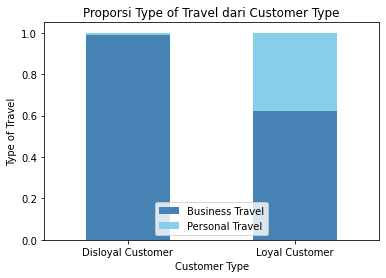

In [246]:
plt.figure(figsize=(20,20))
normalize_customer_type_travel.plot.bar(color=('steelblue','skyblue'), stacked=True)
plt.ylabel('Type of Travel')
plt.xticks(rotation=0)
plt.legend(loc=8)
plt.title('Proporsi Type of Travel dari Customer Type')

plt.show()

Dari hasil cross tabulasi dan grafik di atas, terlihat bahwa:
* Jumlah **loyal** customer dengan business travel **>** jumlah **loyal** customer dengan personal travel
* Jumlah **disloyal** customer business travel **>** jumlah **disloyal** customer personal travel
* Jumlah penumpang paling tinggi dengan tujuan **business**



In [74]:
ct_class_customer=pd.crosstab(df['Class'],df['Customer Type'])
ct_class_customer['Total']=ct_class_customer.sum(axis=1)
ct_class_customer.sort_values('Total',ascending=False)

Customer Type,Disloyal Customer,Loyal Customer,Total
Class,,,
Business,7356,42309,49665
Eco,10910,35835,46745
Eco Plus,715,6779,7494


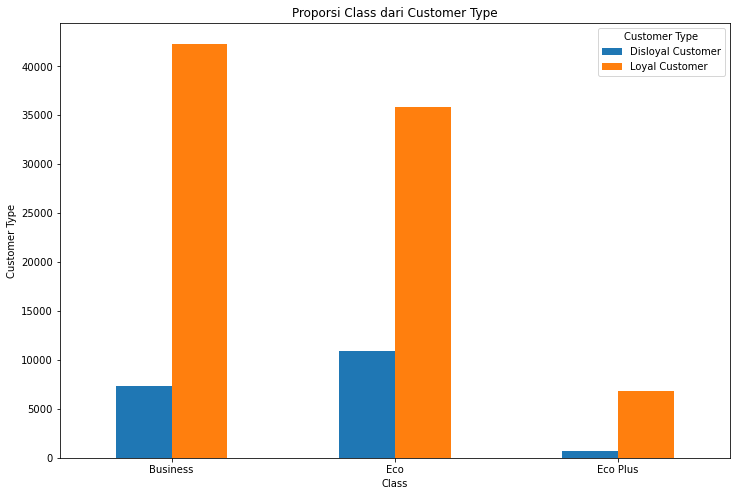

In [253]:
ct_class_customer.sort_values('Loyal Customer', ascending=False).drop(columns='Total').plot(kind='bar', figsize=(12,8))
plt.ylabel('Customer Type')
plt.title('Proporsi Class dari Customer Type')
plt.xticks(rotation=0)
plt.show()

Dari hasil cross tabulasi dan grafik di atas, terlihat bahwa:
* Jumlah penumpang terbanyak adalah penumpang kelas **business**
* Jumlah **loyal** customer paling banyak adalah pemumpang loyal customer kelas **business**
* Jumlah **disloyal** customer paling banyak adalah pemumpang disloyal customer kelas **eco**

Dari pernyataan, tabel, dan grafik di atas kita dapat menjawab pertanyaan:
* **Loyal customer** mayoritas adalah **pria**, kita perlu memerhatikan **wanita**. Mungkin kita dapat meningkatkan peromosi untuk **wanita**
* **Loyal customer** mayoritas berasal dari **middle age**
* **Disloyal customer** dan **loyal customer** dengan tujuan **personal travel** memiliki proporsi **kecil**. Maskapai perlu meningkatkan promosi-promosi agar penumpang yang pergi berlibur lebih tertarik dengan maskapai kita

## 5.2. Karakteristik Satisfied

Pertama kita lihat terlebih dahulu suatu hasil survey dapat disimpulkan **satisfied** saat rata-rata hasil survey tersebut berapa Kita sudah memiliki **feature_hasil_survey**, selanjutnya kita dapat mencari nilai rata-rata dari masing-masing penumpang

In [130]:
df[feature_hasil_survey].head()

,Inflight Wifi Service,Departure/Arrival Time Convenient,Ease of Online Booking,Gate Location,Food and Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room Service,Baggage Handling,Checkin Service,Inflight Service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3


In [134]:
df.drop(columns='rata_hasil_survey')

,Id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenient,Ease of Online Booking,...,Inflight Entertainment,On-board Service,Leg Room Service,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18,Neutral or Dissatisfied
1,5047,Male,Disloyal Customer,25,Business Travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6,Neutral or Dissatisfied
2,110028,Female,Loyal Customer,26,Business Travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0,Satisfied
3,24026,Female,Loyal Customer,25,Business Travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9,Neutral or Dissatisfied
4,119299,Male,Loyal Customer,61,Business Travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,Disloyal Customer,23,Business Travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0,Neutral or Dissatisfied
103900,73097,Male,Loyal Customer,49,Business Travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0,Satisfied
103901,68825,Male,Disloyal Customer,30,Business Travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14,Neutral or Dissatisfied
103902,54173,Female,Disloyal Customer,22,Business Travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0,Neutral or Dissatisfied


In [135]:
df['rata_hasil_survey']=round(df[feature_hasil_survey].mean(axis=1),2)
df[['rata_hasil_survey','Satisfaction']].head()

,rata_hasil_survey,Satisfaction
0,3.86,Neutral or Dissatisfied
1,2.29,Neutral or Dissatisfied
2,3.71,Satisfied
3,3.00,Neutral or Dissatisfied
4,3.50,Satisfied


In [141]:
df.loc[df['Satisfaction']=='Satisfied','rata_hasil_survey'].unique()

array([3.71, 3.5 , 4.5 , 3.43, 3.79, 4.21, 4.29, 3.  , 2.79, 3.21, 3.93,
       3.86, 4.  , 2.86, 3.57, 2.93, 4.07, 3.36, 4.57, 4.14, 4.43, 3.14,
       3.07, 3.29, 4.36, 2.71, 3.64, 2.36, 4.79, 4.71, 2.57, 2.29, 2.07,
       1.86, 2.14, 2.5 , 1.93, 2.64, 4.64, 1.43, 4.86, 1.79, 2.43, 2.  ,
       2.21, 4.93, 1.21, 1.57, 1.29, 1.64, 1.71, 1.5 , 1.36, 5.  , 1.07,
       1.14])

In [ ]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
list_1 = []
for i in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

In [152]:
pd.set_option('display.max_colwidth', -1)
list_1=[]
for i in df['Satisfaction'].unique():
    list_1.append([i,df.loc[df['Satisfaction']==i,'rata_hasil_survey'].unique()])

tabel_rata=pd.DataFrame(columns=['Satisfaction', 'Unique rata_hasil_survey'],data=list_1)              
    
tabel_rata

C:\Users\Icha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Satisfaction,Unique rata_hasil_survey
0,Neutral or Dissatisfied,"[3.86, 2.29, 3.0, 2.5, 2.79, 2.07, 2.93, 3.57, 2.43, 2.21, 2.36, 3.21, 2.64, 3.79, 3.93, 4.07, 4.14, 2.0, 3.5, 1.79, 3.07, 3.36, 2.57, 1.93, 2.86, 3.43, 3.14, 3.64, 4.0, 3.71, 2.71, 1.29, 3.29, 2.14, 4.21, 1.86, 1.71, 4.29, 1.64, 4.43, 1.57, 4.36, 1.43, 1.5, 4.5, 4.64, 1.14, 4.57, 1.21, 1.36]"
1,Satisfied,"[3.71, 3.5, 4.5, 3.43, 3.79, 4.21, 4.29, 3.0, 2.79, 3.21, 3.93, 3.86, 4.0, 2.86, 3.57, 2.93, 4.07, 3.36, 4.57, 4.14, 4.43, 3.14, 3.07, 3.29, 4.36, 2.71, 3.64, 2.36, 4.79, 4.71, 2.57, 2.29, 2.07, 1.86, 2.14, 2.5, 1.93, 2.64, 4.64, 1.43, 4.86, 1.79, 2.43, 2.0, 2.21, 4.93, 1.21, 1.57, 1.29, 1.64, 1.71, 1.5, 1.36, 5.0, 1.07, 1.14]"


Berdasarkan tabel di atas, ada beberapa nilai `rata_hasil_survey` yang **aneh**. Bisa dilihat ada yang dinilai **satisfied** tetapi nilai rata-rata keseluruhannya **<3**. Sebaliknya, saat kesimpulan **Neutral or Dissatisfied** ada yang nilai rata-rata keseluruhannya **>3**. Hal tersebut dapat ditinjau lebih lanjut

In [154]:
df.loc[(df['Satisfaction']=='Satisfied')&(df['rata_hasil_survey']<3), feature_hasil_survey].head()

,Inflight Wifi Service,Departure/Arrival Time Convenient,Ease of Online Booking,Gate Location,Food and Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room Service,Baggage Handling,Checkin Service,Inflight Service,Cleanliness
26,1,1,1,1,1,5,3,4,4,4,3,5,4,2
42,0,0,0,3,2,5,3,4,4,4,4,4,4,3
44,1,1,1,1,3,5,5,3,3,3,3,4,3,5
83,4,0,4,4,1,4,1,1,3,4,4,4,5,1
88,3,3,3,3,1,1,3,4,4,4,4,3,4,1


In [157]:
df.loc[(df['Satisfaction']=='Neutral or Dissatisfied')&(df['rata_hasil_survey']>=3), feature_hasil_survey].head()

,Inflight Wifi Service,Departure/Arrival Time Convenient,Ease of Online Booking,Gate Location,Food and Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room Service,Baggage Handling,Checkin Service,Inflight Service,Cleanliness
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
37,4,3,4,2,2,4,2,2,5,1,4,3,4,2
58,3,3,3,3,4,3,4,4,1,1,4,2,3,4
179,4,1,1,1,2,4,4,4,4,3,4,2,4,4
238,2,4,5,1,2,4,5,3,3,5,3,1,3,1


Dari tabel di atas,
* Terdapat penumpang merasa **satisfied** walaupun menilai beberapan kolom pada `feature_hasil_survey` **kecil**
* Terdapat penumpang merasa **neutral or dissatisfied** walaupun menilai beberapan kolom pada `feature_hasil_survey` **besar**

sehingga kemungkinan adanya perhitungan bobot dari masing-masing kolom `feature_hasil_survey` dalam pengambilan kesimpulan `Satisfaction`

### 5.2.1. Berdasarkan `feature_hasil_survey` 
Untuk mencari bobot, kita asumsikan bahwa penumpang yang menilai suatu layanan **>2** benar-benar merasa **satisfied**, begitu pula sebaliknya.  

Kita dapat menganalisa dengan proporsi masing-masing kolom `feature_hasil_survey`


C:\Users\Icha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 1440x1440 with 0 Axes>

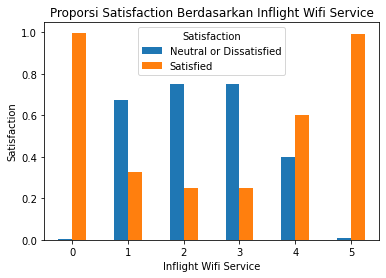

<Figure size 1440x1440 with 0 Axes>

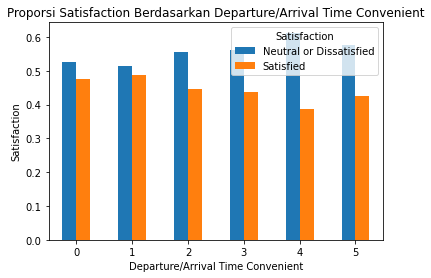

<Figure size 1440x1440 with 0 Axes>

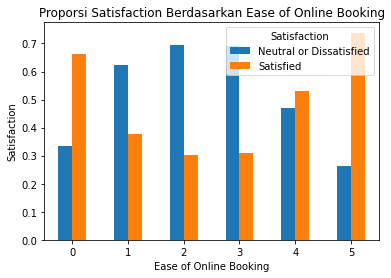

<Figure size 1440x1440 with 0 Axes>

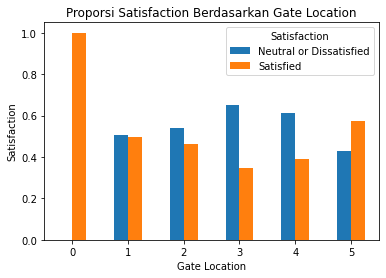

<Figure size 1440x1440 with 0 Axes>

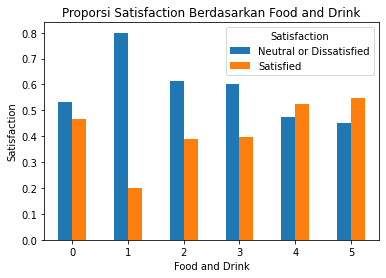

<Figure size 1440x1440 with 0 Axes>

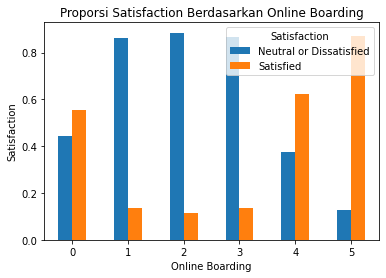

<Figure size 1440x1440 with 0 Axes>

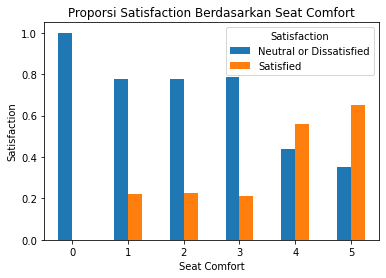

<Figure size 1440x1440 with 0 Axes>

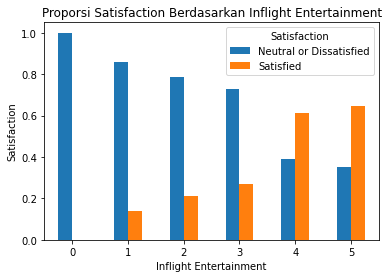

<Figure size 1440x1440 with 0 Axes>

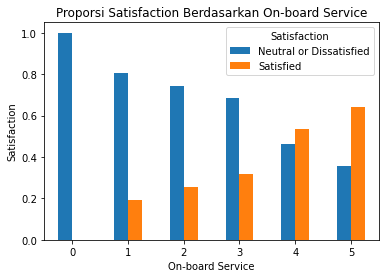

<Figure size 1440x1440 with 0 Axes>

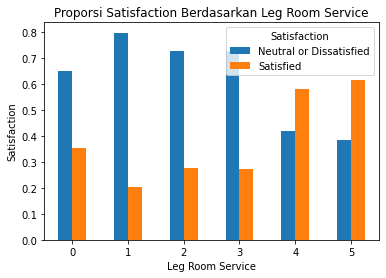

<Figure size 1440x1440 with 0 Axes>

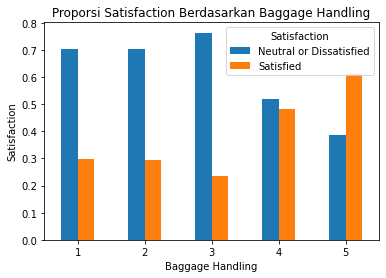

<Figure size 1440x1440 with 0 Axes>

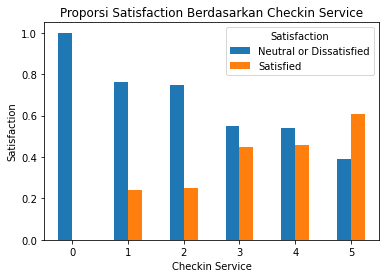

<Figure size 1440x1440 with 0 Axes>

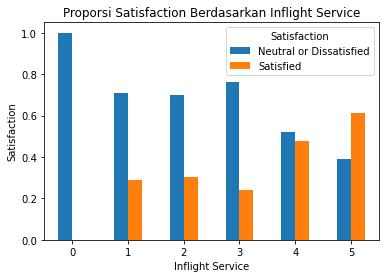

<Figure size 1440x1440 with 0 Axes>

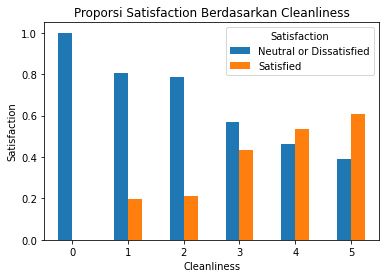

In [256]:
for i in feature_hasil_survey:
    plt.figure(figsize=(20,20))
    pd.crosstab(df[i], df['Satisfaction'], normalize='index').plot.bar()
    plt.title(f'Proporsi Satisfaction Berdasarkan {i}')
    plt.ylabel('Satisfaction')
    plt.xticks(rotation=0)

* Apabila jumlah proposi **satisfied** menilai suatu kolom pada `feature_hasil_survey` **0<1<2<3<4<5** , kita asumsikan bahwa kolom tersebut memiliki **bobot besar** atau paling penting dalam penarikan kesimpulan.
* Apabila jumlah proposi **satisfied** menilai suatu kolom pada `feature_hasil_survey` **0>1>2>3>4>5** , kita asumsikan bahwa kolom tersebut memiliki **bobot kecil** atau tidak begitu penting dalam penarikan kesimpulan.
* Apabila jumlah proposi **satisfied** menilai suatu kolom pada `feature_hasil_survey` **0>1>2>3<4<5** atau naik turunnya **tidak konstan**, kita asumsikan bahwa kolom tersebut memiliki **bobot sedang** atau penting tetapi tidak begitu penting dalam penarikan kesimpulan.

Dari hasil grafik di atas:
* `feature_hasil_survey` yang paling penting:
    * `on board service`
    * `cleanliness`
    * `checkin service`
    * `seat comfort`
    * `inflight entertainment`
    * `inflight service`
* `feature_hasil_survey` yang penting tetapi tidak begitu penting:
    * `baggange handling`
    * `food and drink`
    * `inflight wifi service`
    * `online boarding`
    * `ease online booking`
    * `leg room service`
* `feature_hasil_survey` yang tidak penting:
    * `departure/arrival time convenient`
    * `gate location`

In [260]:
df.groupby('Satisfaction')[feature_hasil_survey].mean()

,Inflight Wifi Service,Departure/Arrival Time Convenient,Ease of Online Booking,Gate Location,Food and Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room Service,Baggage Handling,Checkin Service,Inflight Service,Cleanliness
Satisfaction,,,,,,,,,,,,,,
Neutral or Dissatisfied,2.399633,3.129112,2.546850,2.976121,2.95805,2.656125,3.036295,2.894156,3.019158,2.990812,3.375991,3.042952,3.388814,2.936123
Satisfied,3.161288,2.970305,3.031582,2.977879,3.52131,4.027474,3.966530,3.964931,3.857324,3.822143,3.966396,3.646041,3.969461,3.744342


Kita dapat mengutamakan dan memperbaiki layanan dengan **penting** terlebih dahulu

## 5.3. Hubungan `Customer Type` dan `Satisfaction`

In [158]:
ccc=df.groupby('Customer Type')[feature_hasil_survey].mean().round(2).T
ddd=ccc.sort_values('Loyal Customer',ascending=True)
ddd

Customer Type,Disloyal Customer,Loyal Customer
Inflight Wifi Service,2.71,2.73
Ease of Online Booking,2.70,2.77
Gate Location,2.99,2.97
Departure/Arrival Time Convenient,2.39,3.21
Food and Drink,3.03,3.24
Checkin Service,3.22,3.32
Cleanliness,3.05,3.34
Online Boarding,2.71,3.37
Leg Room Service,3.22,3.38
On-board Service,3.23,3.42


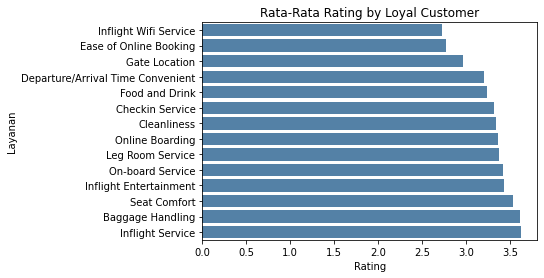

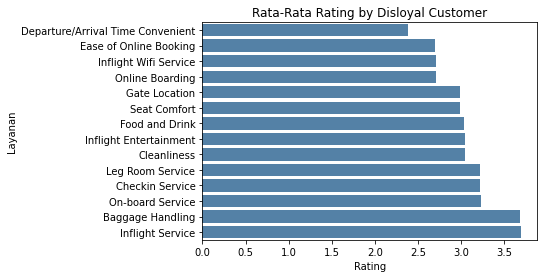

In [258]:
for i in df['Customer Type'].unique():
    eee=ccc.sort_values(i,ascending=True)
    sns.barplot(x=eee[i], y=eee.index, color='steelblue')
    plt.xlabel('Rating')
    plt.ylabel('Layanan')
    plt.title(f'Rata-Rata Rating by {i}')
    plt.show()

Berdasarkan grafik dan tabel di atas, saran untuk maskapai adalah:
* Layanan `ease online booking`, `inflight wifi service` perlu ditingkatkan karena:
    * masuk ke dalam 5 penilaian terendah dari **loyal customer** dan **disloyal customer**
    * masuk ke dalam kelompok bobot **cukup penting**
* Walaupun `departure/arrival time convenient` tidak begitu penting, tetapi perlu ditingkatkan karena termasuk ke dalam **5 penilaian terendah**
* `Cleanliness` termasuk bobot **paling penting** dan masuk ke dalam **10 nilai rata-rata terendah** maka layanan tersebut **harus** ditingkatkan

# 6. Kesimpulan dan Saran
Dari analisis yang telah dilakukan, kita dapat menyimpulkan bahwa:
* Jumlah **loyal customer** lebih tinggi dibandingkan proporsi **disloyal customer**
* Jumlah **loyal customer** yang **satisfied** lebih rendah dibandingkan yang **neutral or dissatisfied**
* Jumlah **loyal customer** paling banyak adalah penumpang pria, penumpang berusia middle age, penumpang kelas bisnis, dan penumpang dengan tujuan perjalanan bisnis.
* Terdapat bobot dari masing-masing kolom layanan atau `feature_hasil_survey` dalam pengambilan kesimpulan
* Bobot-bobot penilaian terbagi menjadi paling penting, cukup penting, dan tidak penting.

Setelah menganalisis, kita dapat menyarankan:
* Untuk meningkatkan jumlah penumpang dan meningkatkan keuntungan, perusahaan maskapai perlu mempertahankan **loyal customer** dan meningkatkan jumlahnya.
* Untuk mempertahankan **loyal customer** dan meningkatkan jumlahnya, perusahaan maskapai perlu meningkatkan layanan dengan nilai rata-rata rendah, seperti: `ease online booking`, `inflight wifi service`, `cleanliness`, dan `departure/arrival time convenient` 
* Selain itu, perusahan maskapai perlu memberi promosi lebih untuk menarik pelanggan **wanita**, pelanggan **berusia muda**, dan pelanggan yang pergi dengan tujuan **bukan urusan bisnis atau pekerjaan**